<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame
df_instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de leer los datos y buenas observaciones iniciales.<br/>
    
  
</div>


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Al cargar los datos por primera vez y mandar a llamar a el método info() para dar un vistazo noté que a pesar de que están en formato .csv todos los archivos venían separados por un caracter distinto (";"), mismo que tuve que agregar como valor al parámetro sep= para poder tener una buena lectura de cada uno de los set de datos proporcionados. 

Además los 3 DataFrames que contienen más información (df_instacart_orders, df_products y df_order_products) tienen datos ausentes.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
df_instacart_orders.duplicated().sum()

15

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_instacart_orders_filtered = df_instacart_orders.query("order_dow == 3 and order_hour_of_day == 2")
df_instacart_orders_filtered.info()
print()
print("# de valores únicos: ", df_instacart_orders_filtered['order_id'].nunique())
print("# de valores duplicados: ", df_instacart_orders_filtered.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 4838 to 477526
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                121 non-null    int64  
 1   user_id                 121 non-null    int64  
 2   order_number            121 non-null    int64  
 3   order_dow               121 non-null    int64  
 4   order_hour_of_day       121 non-null    int64  
 5   days_since_prior_order  114 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 6.6 KB

# de valores únicos:  106
# de valores duplicados:  15


¿Qué sugiere este resultado?

Qué existen 15 registros con valor para order_id que esta duplicado por lo que habrá que manejar este detalle para tener un conjunto de datos limpio.

In [10]:
# Elimina los pedidos duplicados
df_instacart_orders = df_instacart_orders.drop_duplicates().reset_index(drop = True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
df_instacart_orders.duplicated().sum()

0

In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
df_instacart_orders['order_id'].duplicated().sum()

0

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Los duplicados fueron eliminados correctamente
</div>


Describe brevemente tus hallazgos y lo que hiciste con ellos

Se encontraron algunas filas que estaban duplicadas mismas que fueron procesadas mediante el método ""drop_duplicates()"" y posteriormente se comprobó que la acción se haya ejecutado de manera correcta verificando el número de valores duplicados.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
df_products.duplicated().sum()

0

In [14]:
# Revisa únicamente si hay ID de productos duplicados
df_products['product_id'].duplicated().sum()

0

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name_upper'] = df_products['product_name'].str.upper()
df_products['product_name_upper'].duplicated().sum()

1361

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products_filtered = df_products.query("product_name_upper != ''")
print("# de valores duplicados:", df_products_filtered['product_name_upper'].duplicated().sum())
print("# de valores únicos:", df_products_filtered['product_name_upper'].nunique())
df_products = df_products.drop(labels=['product_name_upper'], axis='columns')

# de valores duplicados: 1361
# de valores únicos: 48332


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se encontraron un total de 1361 valores duplicados después de la conversión a mayúsculas en la columna product_name.
Cree una columna para almacenar los nombres en mayúsculas durante el proceso y la elimine al terminar para dejar el dataframe como se veía originalmente.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Los datos han sido revisados apropiadamente
</div>


### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
df_departments.duplicated().sum()

0

In [18]:
# Revisa únicamente si hay IDs duplicadas de departamentos
df_departments['department_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Este conjunto de datos no contenía duplicados por lo que solo se verifico el dato mediante el conteo con duplicated().sum().

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
df_aisles.duplicated().sum()

0

In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
df_aisles['aisle_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Este conjunto de datos no contenía duplicados por lo que solo se verifico el dato mediante el conteo con duplicated().sum().

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
df_order_products.duplicated().sum()

0

In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_order_products.duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Este conjunto de datos no contenía duplicados por lo que solo se verifico el dato mediante el conteo con duplicated().sum().

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Estos últimos dataframes no cuentan con filas totalmente duplicadas.

</div>


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_products.isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


Describe brevemente cuáles son tus hallazgos.

El conteo muestra un grupo de valores que son ausentes (1258).

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_products_depart_aisle_filtered = df_products.query("department_id == 21 and aisle_id == 100")
print(df_products_depart_aisle_filtered.head(15))

     product_id product_name  aisle_id  department_id
37           38          NaN       100             21
71           72          NaN       100             21
109         110          NaN       100             21
296         297          NaN       100             21
416         417          NaN       100             21
436         437          NaN       100             21
439         440          NaN       100             21
471         472          NaN       100             21
490         491          NaN       100             21
555         556          NaN       100             21
561         562          NaN       100             21
613         614          NaN       100             21
623         624          NaN       100             21
689         690          NaN       100             21
767         768          NaN       100             21


Describe brevemente cuáles son tus hallazgos.

Al hacer un filtrado por el pasillo sugerido se puede notar que los nombres ausentes coinciden con el id 21.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_products_depart_aisle_filtered.head(15))

     product_id product_name  aisle_id  department_id
37           38          NaN       100             21
71           72          NaN       100             21
109         110          NaN       100             21
296         297          NaN       100             21
416         417          NaN       100             21
436         437          NaN       100             21
439         440          NaN       100             21
471         472          NaN       100             21
490         491          NaN       100             21
555         556          NaN       100             21
561         562          NaN       100             21
613         614          NaN       100             21
623         624          NaN       100             21
689         690          NaN       100             21
767         768          NaN       100             21


Describe brevemente cuáles son tus hallazgos.

Al hacer un filtrado por el departamento sugerido se puede notar que los nombres ausentes coinciden con el id 100.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
df_department_filtered = df_departments.query("department_id == 21")
print(df_department_filtered)
df_aisle_filtered = df_aisles.query("aisle_id == 100")
print()
print(df_aisle_filtered)

    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.

Al filtrar ambos Dataframes con los id's correspondientes para cada uno se puede notar que no tienen asignado un nombre que los identifique, solo aparece la leyenda 'missing'.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')

Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta
</div>


### `orders` data frame

In [28]:
# Encuentra los valores ausentes
df_instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No, solo la columna "days_since_prior_order" es la que presenta valores ausentes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Buena manera de revisar los datos y encontrar que no hay ausentes que no sean un primer pedido
</div>


### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("Valor mínimo: ", df_order_products['add_to_cart_order'].min())
print("Valor máximo: ", df_order_products['add_to_cart_order'].max())

Valor mínimo:  1.0
Valor máximo:  64.0


Describe brevemente cuáles son tus hallazgos.

No se especifica a qué columna se refieren pero infiero que se refieren a la única que tiene datos ausentes, los valores mostrados arriba corresponden a la columna "add_to_cart_order".

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
df_order_ids = df_order_products[df_order_products["add_to_cart_order"].isna()][["order_id"]]
print(df_order_ids)

         order_id
737       2449164
9926      1968313
14394     2926893
16418     1717990
30114     1959075
...           ...
4505662   1800005
4511400   1633337
4517562    404157
4534112   1673227
4535739   1832957

[836 rows x 1 columns]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
df_order_group = df_order_products.groupby(by='order_id')['product_id'].count()
print(df_order_group)
print()
print("Valor mínimo: ", df_order_group.min())


order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

Valor mínimo:  1


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!<br/>
    
El valor minimo para ordenes que tienen valores nulos es `65`, te dejo el código para encontrar la solución

```
# Código del revisor
df_order_products[df_order_products['order_id'].isin(df_order_ids)].groupby('order_id')['product_id'].count().min()
```
</div>


In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')

df_order_products.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta
</div>


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se reemplazaron los valores ausentes de la columna "add_to_cart_order", se le asigno un valor y se le aplico el método astype() para asignarle el tipo de dato requerido para dicha columna.

Al final se comprobo que no hubiera datos ausentes en el dataframe ya ajustado.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(df_instacart_orders['order_dow'].min())
print(df_instacart_orders['order_dow'].max())

0
6


In [36]:
print(df_instacart_orders['order_hour_of_day'].min())
print(df_instacart_orders['order_hour_of_day'].max())

0
23


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Se verificó que los datos sean sensibles correctamente
</div>


Escribe aquí tus conclusiones

Al obtener lo valores mínimo y máximo de ambas columnas se puede notar que los rangos para cada una de ellas es correcto, 0 a 6 para "order_dow" ;y 0 a 23 para "order_hour_of_day".

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

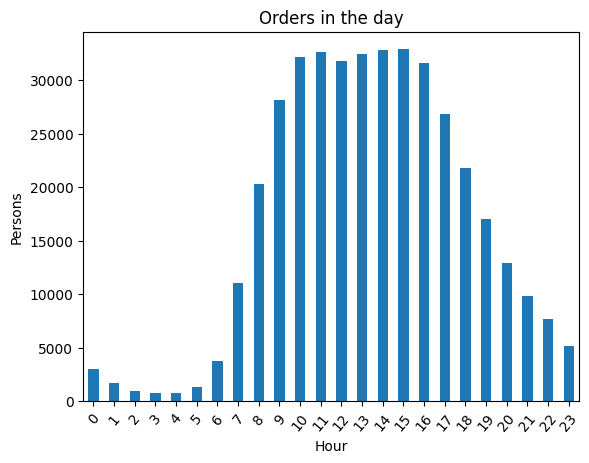

In [37]:
orders_by_hour = df_instacart_orders.groupby("order_hour_of_day")["user_id"].nunique()

orders_by_hour.plot(kind='bar',
                    title='Orders in the day',
                   xlabel='Hour',
                   ylabel='Persons',
                   rot=50)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Buena manera de presentar los datos
</div>


Escribe aquí tus conclusiones

Se puede notar que la gente hace más ordenes alrededor de las 9 de la mañana y 5 de la tarde,

### [A3] ¿Qué día de la semana compran víveres las personas?

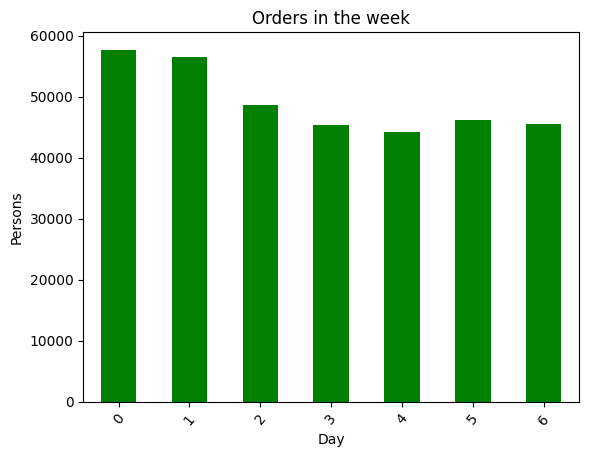

In [38]:
orders_by_day = df_instacart_orders.groupby("order_dow")["user_id"].nunique()

orders_by_day.plot(kind='bar',
                    title='Orders in the week',
                   xlabel='Day',
                   ylabel='Persons',
                   rot=50,
                  color='green')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Los domingos son los días preferidos de los clientes
</div>


Escribe aquí tus conclusiones

Los días en que la gente prefiere comprar son los domingos, lunes y martes, siendo estos días lo de más afluencia que se notan en el gráfico.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [39]:
print("Mínimo de días: ", df_instacart_orders['days_since_prior_order'].min())
print("Máximo de días: ", df_instacart_orders['days_since_prior_order'].max())

Mínimo de días:  0.0
Máximo de días:  30.0


Escribe aquí tus conclusiones

En cuanto al valor mínimo se puede ver que el cliente no espera un solo día para hacer un nuevo pedido y sobre el día máximo, un cliente no tarda más de un mes sin hacer un nuevo pedido siendo 30 el número de días máximo que trancurren entre una orden y otra.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Los resultados son correctos
<br />
Hasta este punto no podemos saber si realmente los usuarios esperan 30 días para realizar otra compra o es el sistema el que agrupa todas las compras que sean mayores a 30 días en el día 30.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

En este caso recomendaría hacer una grafica con la que podamos ver los cambios, con la gráfica podemos observar que la mayoría de usuarios se concentra entre 1 y 9 días donde después los números descienden gradualmente
</div>


# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
df_orders_by_days = df_instacart_orders[df_instacart_orders["order_dow"].isin([3, 6])]

In [41]:
df_orders_by_days_hour = df_orders_by_days.groupby(["order_hour_of_day", "order_dow"])["user_id"].count().unstack()

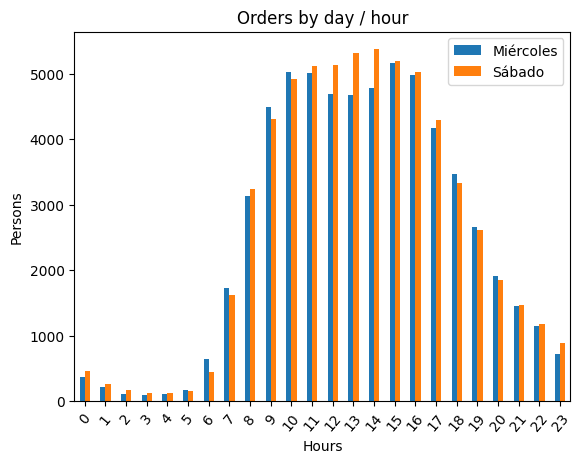

In [42]:
df_orders_by_days_hour.plot(kind='bar',
                            title='Orders by day / hour',
                            xlabel='Hours',
                            ylabel='Persons',
                           legend=False,
                           rot=50)
plt.legend(['Miércoles', 'Sábado'])
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!
<br />
Buena manera de mostrar los resultados de ambos días en una misma grafica
</div>


Escribe aquí tus conclusiones

Con esta gráfica se puede observar que en horario con más tráfico identificado en la parte de arriba (9 a 5 de la tarde) se hacen más pedidos el día sábado que los miércoles.

No sabía cómo hacer dos barras en la misma gráfica sin que se agruparan y en contré que el método unstack() que use en mi ejercicio me ayudo con el ejercicio.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

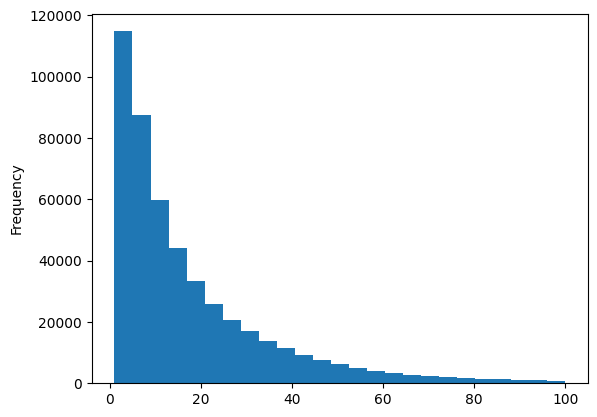

In [43]:
df_instacart_orders['order_number'].plot(kind='hist', bins=25)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/> 

La mayoría de usuarios no ha hecho muchos pedidos, buenas observaciones.

</div>


Escribe aquí tus conclusiones

Puedo observar con el gráfico que la mayoría de clientes han realizado al menos un pedido y menos de 2000 clientes han realizado más de 20 pedidos. Creo poder afirmar que los clientes más participativos han realizado entre 1 y 15 pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [44]:
df_merge_products_order = df_order_products.merge(df_products, on='product_id', how='left')
df_merge_products_order.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,Chicken Breast Tenders Breaded,129,1
1,567889,1560,1,1,Bag Of Ice,37,1
2,2261212,26683,1,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...,91,16
3,491251,8670,35,1,Diced Tomatoes,81,15
4,2571142,1940,5,1,Organic 2% Reduced Fat Milk,84,16


In [45]:
df_top_products = df_merge_products_order.groupby(["product_id", "product_name",])["order_id"].count()
print(df_top_products)

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           280
2           All-Seasons Salt                                                      11
3           Robust Golden Unsweetened Oolong Tea                                  42
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce     49
7           Pure Coconut Water With Orange                                         2
                                                                                ... 
49690       HIGH PERFORMANCE ENERGY DRINK                                          5
49691       ORIGINAL PANCAKE & WAFFLE MIX                                         72
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                       12
49693       SPRING WATER BODY WASH                                                25
49694       BURRITO- STEAK & CHEESE                                     

In [46]:
df_top_products = df_top_products.sort_values(ascending=False).head(20)
print(df_top_products)

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: order_id, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Los resultados son acertados!<br/>
Los clientes tienden a comprar productos naturales, buena manera de mostrar los resultados
</div>


Escribe aquí tus conclusiones

Los clientes tienen dentro de top a productos que pueden ser categorizados como órganicos, tenemos clientes saludables.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [47]:
df_productos_by_order = df_order_products.groupby("order_id")["product_id"].count()
print(df_productos_by_order.head())

order_id
4     13
9     15
11     5
19     3
20     8
Name: product_id, dtype: int64


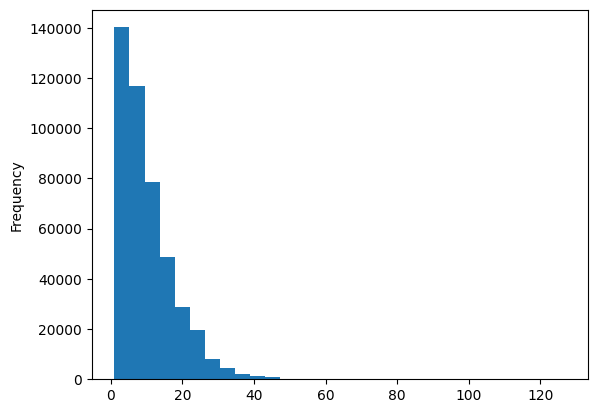

In [48]:
df_productos_by_order.plot(kind='hist', bins=30)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho, el resultado es correcto, los usuarios suelen pedir alrededor de 10 articulos
</div>


In [49]:
df_productos_by_order.mean()

10.098983215049127

Escribe aquí tus conclusiones

Los clientes que hacen pedidos agregan en promedio 10 productos a su orden, lo que puede verse claramente en el gráfica de arriba.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [50]:
print(df_merge_products_order.head())

   order_id  product_id  add_to_cart_order  reordered  \
0   2141543       11440                 17          0   
1    567889        1560                  1          1   
2   2261212       26683                  1          1   
3    491251        8670                 35          1   
4   2571142        1940                  5          1   

                                        product_name  aisle_id  department_id  
0                     Chicken Breast Tenders Breaded       129              1  
1                                         Bag Of Ice        37              1  
2  Cafe Latte Pure Lightly Sweetened Iced Coffee ...        91             16  
3                                     Diced Tomatoes        81             15  
4                        Organic 2% Reduced Fat Milk        84             16  


In [51]:
df_merge_products_order_filtered = df_merge_products_order.query("reordered == 1")
print(df_merge_products_order_filtered.head())

   order_id  product_id  add_to_cart_order  reordered  \
1    567889        1560                  1          1   
2   2261212       26683                  1          1   
3    491251        8670                 35          1   
4   2571142        1940                  5          1   
5   2456893       21616                  4          1   

                                        product_name  aisle_id  department_id  
1                                         Bag Of Ice        37              1  
2  Cafe Latte Pure Lightly Sweetened Iced Coffee ...        91             16  
3                                     Diced Tomatoes        81             15  
4                        Organic 2% Reduced Fat Milk        84             16  
5                               Organic Baby Arugula       123              4  


In [52]:
df_top_reordered_products = df_merge_products_order_filtered.groupby(["product_id", "product_name",])["order_id"].count()
print(df_top_reordered_products)

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           158
3           Robust Golden Unsweetened Oolong Tea                                  31
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce     25
7           Pure Coconut Water With Orange                                         1
8           Cut Russet Potatoes Steam N' Mash                                      6
                                                                                ... 
49690       HIGH PERFORMANCE ENERGY DRINK                                          4
49691       ORIGINAL PANCAKE & WAFFLE MIX                                         31
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                        5
49693       SPRING WATER BODY WASH                                                11
49694       BURRITO- STEAK & CHEESE                                     

In [53]:
df_top_reordered_products = df_top_reordered_products.sort_values(ascending=False).head(20)
print(df_top_reordered_products)

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: order_id, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/> 
Buena manera de mostrar los resultados, los productos naturales son consistentemente los más vendidos
</div>


Escribe aquí tus conclusiones

Los clientes vuelven a pedir productos órganicos, son los populares en las órdenes.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [77]:
#Solución 1
agg_dict = {"reordered": ["count", "sum"]}

In [73]:
df_reorder_products = df_order_products.groupby("product_id").agg(agg_dict)
print(df_reorder_products.head(10))

           reordered     
               count  sum
product_id               
1                280  158
2                 11    0
3                 42   31
4                 49   25
7                  2    1
8                 19    6
9                 21   16
10               337  151
11                16   10
12                41   16


In [80]:
#Solución 2
df_reorder = df_order_products.groupby("product_id")["reordered"].agg(
    total_pedidos="count", 
    total_reordenes="sum")
df_reorder["proporcion_reorden"] = df_reorder["total_reordenes"] / df_reorder["total_pedidos"]
print(df_reorder.head(10))
print(df_reorder["proporcion_reorden"].mean())

            total_pedidos  total_reordenes  proporcion_reorden
product_id                                                    
1                     280              158            0.564286
2                      11                0            0.000000
3                      42               31            0.738095
4                      49               25            0.510204
7                       2                1            0.500000
8                      19                6            0.315789
9                      21               16            0.761905
10                    337              151            0.448071
11                     16               10            0.625000
12                     41               16            0.390244
0.38670677893645


Escribe aquí tus conclusiones

En la solución 1 no encotré como poder obtener la proporción utilizando las columnas generadas en el agrupado.

La solución 2 la tuve que buscar, en esta se se le agregan nombres personalizados a cada calculo del agg para posteriormente poder usarlos para realizar el calculo que se necesita.

Parece que el total de pedidos y los reordenados me coindicen en ambos dataframes al menos observando una muestra de los primeros 10 resultados.
El promedio de productos que se vuelven a pedir es de casi el 40%.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [81]:
df_merged_cart_orders = df_order_products.merge(df_instacart_orders[["order_id", "user_id"]], on="order_id", how="left")

In [86]:
df_reordered_by_user = df_merged_cart_orders.groupby("user_id")["reordered"].agg(
    total_products="count",
    total_reorders="sum"
)

df_reordered_by_user["total_reorder_products"] = df_reordered_by_user["total_reorders"] / df_reordered_by_user["total_products"]

print(df_reordered_by_user.head())
print(df_reordered_by_user["total_reorder_products"].mean())

         total_products  total_reorders  total_reorder_products
user_id                                                        
2                    26               1                0.038462
4                     2               0                0.000000
5                    12               8                0.666667
6                     4               0                0.000000
7                    14              13                0.928571
0.4948531736151642


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de realizar las proporciones
</div>


Escribe aquí tus conclusiones

Me base en el ejecicio anterior para intentar llegar al resultado, veo que en promedio casi el 50% de los productos de las ordenes ya los habían pedido.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [74]:
df_merge_products_order_filtered_top = df_merge_products_order.query("add_to_cart_order == 1")
print(df_merge_products_order_filtered_top.head())

    order_id  product_id  add_to_cart_order  reordered  \
1     567889        1560                  1          1   
2    2261212       26683                  1          1   
14   1961225       37553                  1          1   
16    639939       10017                  1          1   
23    750040        8518                  1          0   

                                         product_name  aisle_id  department_id  
1                                          Bag Of Ice        37              1  
2   Cafe Latte Pure Lightly Sweetened Iced Coffee ...        91             16  
14                          Iced Coffee Lightly Sweet        26              7  
16                                      Tilapia Filet        39             12  
23                                  Organic Red Onion        83              4  


In [75]:
df_top_first_products = df_merge_products_order_filtered_top.groupby(["product_id", "product_name",])["order_id"].count()
print(df_top_first_products)

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           47
2           All-Seasons Salt                                                      2
3           Robust Golden Unsweetened Oolong Tea                                  5
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce     1
8           Cut Russet Potatoes Steam N' Mash                                     4
                                                                                 ..
49687       Smartblend Healthy Metabolism Dry Cat Food                            1
49688       Fresh Foaming Cleanser                                                1
49690       HIGH PERFORMANCE ENERGY DRINK                                         2
49691       ORIGINAL PANCAKE & WAFFLE MIX                                         3
49693       SPRING WATER BODY WASH                                                

In [76]:
df_top_first_products = df_top_first_products.sort_values(ascending=False).head(20)
print(df_top_reordered_products)

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: order_id, dtype: int64



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Una vez más los productos orgánicos estan en el top de la lista<br/>
</div>


Escribe aquí tus conclusiones

La Banana sigue siendo el producto principal que los clientes están ordenando en sus pedidos.

### Conclusion general del proyecto:

Puedo decir que este ha sido hasta ahora el proyecto que más trabajo me ha costado, se ha tornado interesante y entretenido. Creo que han añadido temas relevantes que hemos visto durante el sprint y que debemos tener muy claras para poder desarrollarlas durante el ejercicio.

En general me ha gustado, pienso que se acerca mucho a lo que sería resolver problemas en el mundo real con un proyecto de análisis de datos.

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las conclusiones a las que llegaste son buenas y los procedimientos realizados son correctos. Considero que este es un proyecto que se empieza a asemejar más a algún proyecto que te pidan en un trabajo, a partir de análisis de este tipo se pueden diseñar estrategias de marketing específicas para ciertos productos o se pueden optimizar los procesos internos para tener disponibles más rápidamente los productos que se venden más seguido.<br/>
    

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias me parecen bastante acertadas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado
    
</div>
